In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from collections import Counter
from scipy.ndimage import convolve1d, gaussian_filter1d
from scipy.signal.windows import triang
from random import randint

In [2]:
df = pd.read_parquet('../df.pqt')
df

,fileName,gender,country,rate,voices,img
0,001154acf0a14bff8512297114d35e89_m_unknown_7.0...,m,unknown,7.0,100.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,00aeac4d739a4e5ca814a2136e93e2d4_m_unknown_8.0...,m,unknown,8.0,100.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,0118e6a1260a4a55b0fbab0184b6356b_m_unknown_7.8...,m,unknown,7.8,100.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,020981d71e5e4da8b34f39877298f569_m_unknown_7.6...,m,unknown,7.6,100.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,02532b0120c7434fa3d5ff5a1e178ef9_m_unknown_8.0...,m,unknown,8.0,100.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
...,...,...,...,...,...,...
49618,fff6229cd5d2b_m_United Kingdom_6.3_23.png,m,United Kingdom,6.3,23.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
49619,fff66b6910334_w_Canada_6.2_18.png,w,Canada,6.2,18.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
49620,fff97f4533036_m_United Kingdom_5.9_193.png,m,United Kingdom,5.9,193.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
49621,fffd72003c4bc_w_United States_5_1090.png,w,United States,5.0,1090.0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [3]:
df = df.groupby(['gender', 'country', 'img'], as_index=False).agg(
    {'fileName': 'first', 'rate': 'mean', 'voices': 'sum'}
).reset_index(drop=True)
df = df.loc[(df['gender'] == 'w') & (df['voices'] >= 60)].sort_values('rate').reset_index(drop=True)

df

,gender,country,img,fileName,rate,voices
0,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,aa82f508585d4b49ace485c7ee93e5d7_w_unknown_3.2...,3.2,100.0
1,w,United States,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,e56b5de51d945_w_United States_3.2_849.png,3.2,849.0
2,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,b4f292b6039f4169be2489a66f40fa39_w_unknown_3.2...,3.2,100.0
3,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,d92bd4ce1a50448fa7b8651ebbab0f11_w_unknown_3.2...,3.2,100.0
4,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,eb37da6a85c34e6780a46d17d26e0793_w_unknown_3.2...,3.2,100.0
...,...,...,...,...,...,...
15177,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,aa2e94315afb4b6e8e452c05c7441247_w_unknown_9.0...,9.0,100.0
15178,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,a6f9f39818bd4a26a44161bb17950d2e_w_unknown_9.0...,9.0,100.0
15179,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,c12852a5afc342c484dfaf6f58af3249_w_unknown_9.0...,9.0,100.0
15180,w,unknown,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,8fb14d1833544f3986f5ea919d016f7e_w_unknown_9.0...,9.0,100.0


In [4]:
def normalize_rate(df: pd.DataFrame) -> pd.Series:
    s = df['rate'].copy()
    counts = s.value_counts()
    s = s.apply(lambda x: x + randint(-100000000, 100000000) * 0.000000001 if counts.loc[x] > 1 else x)
    s -= df.loc[df['country'] != 'unknown', 'rate'].median()
    s.loc[s < 0] /= abs(s.min())
    s.loc[s > 0] /= s.max()
    s += abs(s.min())
    s *= 0.5
    s = s.clip(0.001, 0.999)
    return s.clip(0.001, 0.999)

def get_lds_kernel_window(kernel: str, ks: int, sigma: int) -> list:
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

def get_weights(rate: pd.Series, reweight: bool = False) -> pd.Series:
    bin_index_per_label = (rate * 100).astype(int).tolist()
    Nb = max(bin_index_per_label) + 1
    num_samples_of_bins = dict(Counter(bin_index_per_label))
    if reweight:
        num_samples_of_bins = {k: v ** 0.5 for k, v in num_samples_of_bins.items()} # reweight
    emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]
    lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
    eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')
    eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
    weights = [np.float32(1 / x) for x in eff_num_per_label]
    scaling = len(weights) / np.sum(weights)
    weights = [scaling * x for x in weights]
    return pd.Series(weights)

array([[<Axes: title={'center': 'rate'}>]], dtype=object)

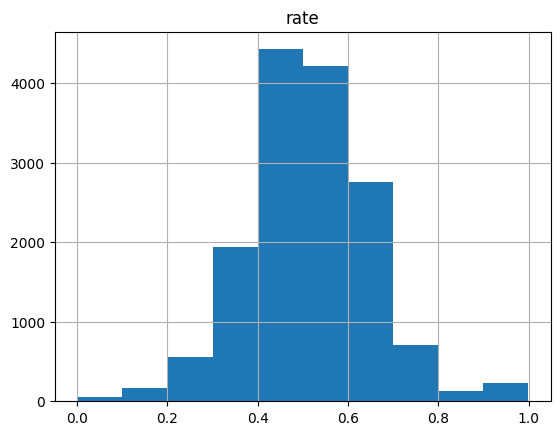

In [5]:
df['rate'] = normalize_rate(df)
df.hist('rate')

<Axes: xlabel='rate'>

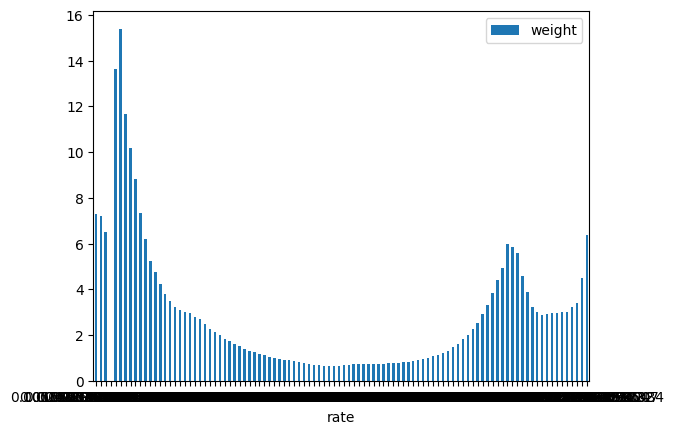

In [6]:
df['weight'] = get_weights(df['rate'], reweight=True)
df['ranges'] = pd.cut(df['rate'], bins=np.arange(0.0, 1.001, 0.01)).apply(lambda x: x.right)
df[['rate', 'weight', 'ranges']].groupby('ranges', as_index=False).mean().plot.bar(x='rate', y='weight', rot=0)

In [7]:
# import matplotlib.pyplot as plt
# from PIL import Image
# from io import BytesIO

# for i in range(30):
#     img = Image.open(BytesIO(df.loc[(df['rate'] > 0.6) & (df['rate'] < 0.7), 'img'].reset_index(drop=True).iloc[i]))
#     plt.figure()
#     plt.imshow(img)
#     plt.show()

In [8]:
df[['rate', 'img', 'weight', 'voices']].to_parquet('../train.pqt')